## Hyperparameter Optimization XGBoost Regression

In [1]:
import numpy as np 
import pandas as pd 
from sklearn import metrics

In [2]:
# warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Pipeline
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [4]:
# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#Cross Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold 
# Searching
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [5]:
 # Algorithms
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LogisticRegression

In [6]:
# Visualization
import sklearn
import numpy as np
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score,mean_squared_error
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

In [7]:
data = pd.read_csv("New_Dataset_Gender_Height_Weight_Age_Calories.csv")

In [8]:
x = data.iloc[:,:4]
y = data.iloc[:,4]

In [9]:
# Feature scalling
# Feature scalling
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.25,random_state=0,shuffle=True)

In [11]:
# Decision Tree Classifier
scores_dict = {}

## Base Model

In [12]:
Base_models = XGBRegressor()
mod="XGBRegressor"
s_base = cross_val_score(Base_models,x,y, cv=5);
results_base=np.average(s_base) ;
print(s_base)
print(results_base)

[0.32095131 0.43117001 0.46288598 0.67839531 0.81383806]
0.5414481339778263


In [13]:
scores_dict['Base Model'] = results_base
results_base

0.5414481339778263

## RandomizedSearchCV

In [14]:
from sklearn.model_selection import RandomizedSearchCV

In [15]:
rs_Param={
    'alpha': [1,30,], 
    'booster': ['gbtree', 'gblinear'],
    'n_estimators' : [10,100,200]

   
}

In [16]:
rs = RandomizedSearchCV(Base_models,rs_Param,cv=5,return_train_score=False,n_iter=10)  
rs.fit(x,y)
pa_r=rs.best_params_
sc_r=rs.best_score_
es_r=rs.best_estimator_
print(pa_r," Score : ",sc_r)
print(es_r)

{'n_estimators': 10, 'booster': 'gbtree', 'alpha': 30}  Score :  0.6446866407401899
XGBRegressor(alpha=30, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=30, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


## GridSearchCV

In [17]:
from sklearn.model_selection import GridSearchCV

In [42]:
clf_Param={
   'alpha': [30], 
    'booster': ['gbtree'],
    'n_estimators' : [15],
    'gamma' : [0.01]
    

}       

In [43]:
clf = GridSearchCV(Base_models, clf_Param, cv=5, return_train_score=False)
clf.fit(x,y)
pa_c=clf.best_params_
sc_c=clf.best_score_
es_c=clf.best_estimator_
print(pa_c," Score : ",sc_c)
print(es_c)

{'alpha': 30, 'booster': 'gbtree', 'gamma': 0.01, 'n_estimators': 15}  Score :  0.6747110970983308
XGBRegressor(alpha=30, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.01, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=15, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=30, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [44]:
Tuned_Model=clf.best_estimator_
Tuned_Model

XGBRegressor(alpha=30, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.01, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=15, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=30, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
scores_dict['Tuned Model'] = sc_c
sc_c

0.6747110970983308

## Boosting Bagging Parameters

In [46]:
# Boosting 

In [50]:
  Adb_params={
    'n_estimators': [1,3,5,7],
    'learning_rate': np.arange(0,1, 0.1).tolist() 
} 

In [51]:
Adbclf = RandomizedSearchCV(  AdaBoostRegressor(Tuned_Model), Adb_params, cv=5, return_train_score=False)
Adbclf.fit(x,y)
pa_Adb=Adbclf.best_params_
sc_Adb=Adbclf.best_score_
es_Adb=Adbclf.best_estimator_
print(pa_Adb)
print(sc_Adb)
print()
print(es_Adb)

{'n_estimators': 1, 'learning_rate': 0.30000000000000004}
0.6767711317304892

AdaBoostRegressor(base_estimator=XGBRegressor(alpha=30, base_score=0.5,
                                              booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0.01,
                                              gpu_id=-1, importance_type='gain',
                                              interaction_constraints='',
                                              learning_rate=0.300000012,
                                              max_delta_step=0, max_depth=6,
                                              min_child_weight=1, missing=nan,
                                              monotone_constraints='()',
                                              n_estimators=15, n_jobs=4,
                                             

In [52]:
scores_dict['Boosting Model'] = sc_Adb
sc_Adb

0.6767711317304892

############################################################################################################################

In [53]:
ModelScores = [results_base,sc_c,sc_Adb]
print("Model Scores : ",ModelScores)
ModelNames= ['Base Moddels','Tuned Model','Adb Models']
print("Model Names : ",ModelNames)

Model Scores :  [0.5414481339778263, 0.6747110970983308, 0.6767711317304892]
Model Names :  ['Base Moddels', 'Tuned Model', 'Adb Models']


In [54]:
print(mod)
for n,s in zip(ModelNames,ModelScores):
    print('{} Accuracy : {}'.format(n,s))  

XGBRegressor
Base Moddels Accuracy : 0.5414481339778263
Tuned Model Accuracy : 0.6747110970983308
Adb Models Accuracy : 0.6767711317304892


In [55]:
best_accuracy=0.0
best_model=""

In [56]:
for n,s in zip(ModelNames,ModelScores):
    if s>best_accuracy:
        best_accuracy=s
        best_model=n

        
print('Classifier with best accuracy : {} : {}'.format(best_model,best_accuracy))

Classifier with best accuracy : Adb Models : 0.6767711317304892


No handles with labels found to put in legend.


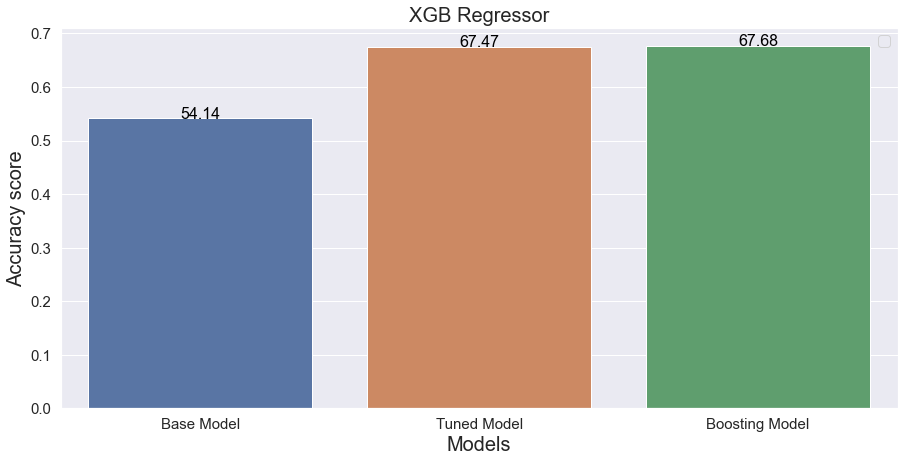

In [58]:
import seaborn as sns

        
with sns.color_palette('muted'):
  algo_name = list(scores_dict.keys())
  scores = list(scores_dict.values())
  #sns.color_palette("Greens_d", len(dataset))
  # deep , light winter spring
  sns.set(rc={'figure.figsize':(15,7)})
  plt.xlabel("Models",fontsize=20)
  plt.ylabel("Accuracy score",fontsize=20)
  plt.title("XGB Regressor",fontsize=20)
  plt.tick_params(labelsize=15)
  plt.legend(loc="best",fontsize=15),
  s=sns.barplot(x=algo_name,y=scores) 
  #legend(labels)
  for idx, val in enumerate(scores):
    s.text(idx,val, round(scores[idx]*100,2), color='black', ha="center",fontsize=16)
    
  plt.show()
